<a href="https://colab.research.google.com/github/youness-1/UniformColoring/blob/main/ProgIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Developing, training and testing the classifier model

Dataset

In [ ]:
!pip install emnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from emnist import list_datasets
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [ ]:
LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
          'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
          'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']
def filterDataset(X_data, y_data):
    assert y_data.dtype == np.uint8
    #classes = [ '*','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j','k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z' ]
    classes = LABELS
    new_data_size = 0
    for recordIndex in range(0, y_data.shape[0]):
        currentLabel = classes[y_data[recordIndex]]
        if currentLabel == 'B' or currentLabel == 'Y' or currentLabel == 'G' or currentLabel == 'T':
            new_data_size += 1

    new_X_data = np.zeros((new_data_size, 28, 28), dtype = X_data.dtype)
    new_y_data = np.zeros((new_data_size,), dtype = np.uint8)

    new_data_index = 0
    for recordIndex in range(0, y_data.shape[0]):
        currentLabel = classes[y_data[recordIndex]]

        if currentLabel != 'B' and currentLabel != 'Y' and currentLabel != 'G' and currentLabel != 'T':
            continue
        
        new_X_data[new_data_index] = X_data[recordIndex]
        new_y_data[new_data_index] = y_data[recordIndex]
        new_data_index += 1
    
    assert new_data_index == new_X_data.shape[0]
    return (new_X_data, new_y_data)

In [ ]:
from emnist import extract_training_samples
from emnist import extract_test_samples
X_train, y_train = extract_training_samples('balanced')
print(y_train.shape)
np.max(y_train)
LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
          'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
          'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']

(112800,)


In [ ]:
def remodulate(y):
  y = np.where( y == LABELS.index("T"), 0, y) #T
  y = np.where( y == LABELS.index("B"), 1, y) #BLUE
  y = np.where( y == LABELS.index("Y"), 2, y) #YELLOW
  y = np.where( y == LABELS.index("G"), 3, y) #GREEN
  return y

In [ ]:
from emnist import extract_training_samples
from emnist import extract_test_samples

X_train, y_train = extract_training_samples('balanced')
X_test, y_test = extract_test_samples('balanced')

print(np.max(X_train),np.max(y_train))

(X_train, y_train_library) = filterDataset(X_train, y_train)
(X_test, y_test) = filterDataset(X_test, y_test)

y_train_library = remodulate(y_train_library)
y_test = remodulate(y_test)

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


255 46


Reshape

In [ ]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2])
print(X_train.shape)
print(X_test.shape)

(9600, 28, 28)
(9600, 784)
(1600, 784)


In [ ]:
model_letters  = keras.Sequential()

model_letters.add(layers.Dense(256, activation='relu', input_shape=(784,)))

model_letters.add(layers.Dense(128, activation='relu'))

model_letters.add(layers.Dense(4, activation='softmax'))

model_letters.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 234,372
Trainable params: 234,372
Non-trainable params: 0
_________________________________________________________________


Training

In [ ]:
batch_size = 256
epochs = 7

model_letters.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_library = model_letters.fit(X_train, y_train_library, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model_letters.save("model.h5")

Epoch 1/7
34/34 [==============================] - 1s 12ms/step - loss: 0.3751 - accuracy: 0.8774 - val_loss: 0.1119 - val_accuracy: 0.9677
Epoch 2/7
34/34 [==============================] - 0s 8ms/step - loss: 0.1153 - accuracy: 0.9604 - val_loss: 0.0907 - val_accuracy: 0.9698
Epoch 3/7
34/34 [==============================] - 0s 8ms/step - loss: 0.0798 - accuracy: 0.9760 - val_loss: 0.0689 - val_accuracy: 0.9771
Epoch 4/7
34/34 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.9838 - val_loss: 0.0588 - val_accuracy: 0.9781
Epoch 5/7
34/34 [==============================] - 0s 8ms/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.0529 - val_accuracy: 0.9823
Epoch 6/7
34/34 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.9929 - val_loss: 0.0551 - val_accuracy: 0.9833
Epoch 7/7
34/34 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.9959 - val_loss: 0.0479 - val_accuracy: 0.9854


Loss e accuracy durante il training

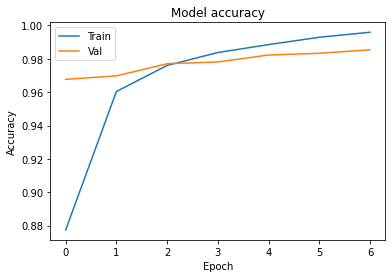

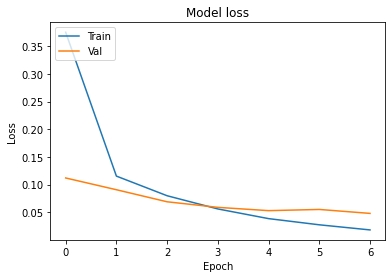

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history_library.history['accuracy'])
plt.plot(history_library.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_library.history['loss'])
plt.plot(history_library.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy =  model_letters.evaluate(X_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


#print(history_library.history)

Test loss: 0.09897685050964355
Test accuracy: 0.9743750095367432


Confusion Matrix

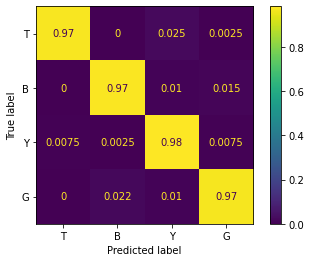

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model_letters.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

confusionMatrix = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = ['T','B','Y','G'])
disp.plot()
plt.show()

Precision, Recall e F1

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       400
           1       0.97      0.97      0.97       400
           2       0.96      0.98      0.97       400
           3       0.97      0.97      0.97       400

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



# Classifier and grid detector




cell extraction from the grid

In [ ]:
!find  . -name 'ROI_*' -exec rm {} \;

In [ ]:
import cv2
import numpy as np

font = cv2.FONT_HERSHEY_COMPLEX 


image  = cv2.imread("4x4.png")
original = image.copy()
ROI_number = 0
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imwrite('gray.png', gray)

blur = cv2.GaussianBlur(gray, (5,5), 0)

cv2.imwrite('blur.png', blur)

thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)


cv2.imwrite('tresh.png', thresh)

max_area = 0
c = 0
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i in contours:
        area = cv2.contourArea(i)
        if area > 70*60:
                if area > max_area:
                    max_area = area
                    best_cnt = i
                    image = cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1


mask = np.zeros((gray.shape),np.uint8)
cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)


out = np.zeros_like(gray)
out[mask == 255] = gray[mask == 255]

c = 0
n = 0

yt = 0
l = []
for i in contours:
    area = cv2.contourArea(i)
    if area > 70*60:

        x,y,w,h = cv2.boundingRect(i)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = original[y:y+h, x:x+w]
        #print(ROI_number," x: ", x, " y: ", y)
        if ROI_number != 0:
            if yt == y:
                ROI = ROI[3:67,3:67] #rimuovi bordo
                cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
                n+=1
            else:
                ROI = ROI[3:67,3:67] #rimuovi bordo
                yt = y
                cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
                n = 1


        ROI_number += 1        
        

        cv2.drawContours(image, contours, c, (0, 255, 0), 3)
    c+=1


Load model

In [ ]:
import tensorflow as tf
model_letters = tf.keras.models.load_model('model.h5')

cell classifier

In [ ]:
l=[]
for i in range(1, ROI_number):
  im = cv2.imread("ROI_"+str(i)+".png")
  im = cv2.bitwise_not(im)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  (thresh, im) = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
  
  #im = im[3:67,3:67]  #rimuovi bordo

  im = cv2.resize(im, dsize=(28, 28), interpolation=cv2.INTER_LINEAR)


  im = np.reshape(im, -1)
  im = im.astype("float32")/255
  im = tf.expand_dims(im, 0)

  prediction = model_letters.predict(im)
  max = np.where(prediction == np.amax(prediction))
  l.append(int(max[1]))



if n < len(l):
    nrow= len(l)/n
else:
    nrow=n/len(l)

nrow = int(nrow)

mat = np.array(list(reversed(l)))

grid=mat.reshape(nrow, n)
show=np.copy(grid)
show = np.where(show==0,'T',show)
show = np.where(show=='1','B',show)
show = np.where(show=='2','Y',show)
show = np.where(show=='3','G',show)
print(show)

[['T' 'Y' 'Y' 'B']
 ['G' 'G' 'B' 'B']
 ['G' 'Y' 'G' 'B']
 ['Y' 'Y' 'G' 'Y']]


## **Problem UniformColoring**

aima-python Import

In [ ]:
!git clone https://github.com/aimacode/aima-python.git

Cloning into 'aima-python'...
remote: Enumerating objects: 5095, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5095 (delta 0), reused 2 (delta 0), pack-reused 5092
Receiving objects: 100% (5095/5095), 17.71 MiB | 28.96 MiB/s, done.
Resolving deltas: 100% (3416/3416), done.


Problem Class UnifomColoring

In [ ]:

import sys
sys.path.append("aima-python")
import numpy as np
import itertools
from enum import Enum
import random
from search import *
import time

direction_cost=1

class Colors(Enum):
    BLUE = 1
    YELLOW = 2
    GREEN = 3

class Directions(Enum):
    UP = (-1, 0)
    DOWN = (1, 0)
    LEFT = (0, -1)
    RIGHT = (0, 1)

class Heuristic(Enum):
    IDEAL = 0
    COLOR = 1
    COLOR_NEAREST_DISTANCE = 2
    COLOR_NEAREST_NEIGHBOR_DISTANCE = 3

class State():
    def __init__(self, grid, i, j):
        self.grid = grid
        self.i = i
        self.j = j
        self.id = str(i)+str(j)
        for row in grid:
            for tile in row:
                self.id = self.id+str(tile)

    def __lt__(self, state):
        return False#self.grid[self.i][self.j] <= state.grid[state.i][state.j]

class UniformColoring(Problem):
    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, heuristic_type=Heuristic.COLOR_NEAREST_NEIGHBOR_DISTANCE):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal.  Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.heuristic_type=heuristic_type

    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        actions=[]
        if (state.i != self.initial.i) or (state.j != self.initial.j):
            for color in Colors:  # action color tile
                if (color.value != state.grid[state.i][state.j]):
                    actions.append(color)
        for direction in Directions:  # action move
            coords=(state.i+direction.value[0],state.j+direction.value[1])
            if coords[0] in range(grid.shape[0]) and coords[1] in range(grid.shape[1]):
                actions.append(direction)
        return actions

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        if action in Directions:
            return State(state.grid,state.i+action.value[0],state.j+action.value[1])
        else:
            grid=np.copy(state.grid)
            grid[state.i][state.j]=action.value
            return State(grid,state.i,state.j)

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        test_color = None
        if ((state.i, state.j) == (self.initial.i, self.initial.j)):  # if it's back at the start position
            for color in Colors:
                if color.value in state.grid:
                    if test_color == None:
                        test_color = color.value
                    if color.value != test_color:
                        return False
        else:
            return False
        return True

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2. If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        if action in Colors:
            return c + action.value
        return c + direction_cost
    def manhattan_distance(self, coord1, coord2):
            return abs(coord2[0] - coord1[0]) + abs(coord2[1] - coord1[1])
    def heuristic(self, node, color):
        if self.heuristic_type == Heuristic.COLOR:
            return self.heuristic_color(node, color)
        elif self.heuristic_type == Heuristic.COLOR_NEAREST_DISTANCE:
            return self.heuristic_color_nearest_distance(node, color)
        elif self.heuristic_type == Heuristic.COLOR_NEAREST_NEIGHBOR_DISTANCE:
            return self.heuristic_color_nearest_neighbor_distance(node, color)
        elif self.heuristic_type == Heuristic.IDEAL:
            return self.heuristic_ideal(node, color)
    def heuristic_ideal(self, node, color):
        color_cost = 0
        grid = node.state.grid
        i = node.state.i
        j = node.state.j
        not_colored = []
        for i in range(len(grid)):
            for j in range(len(grid[i])):
                if(grid[i][j] != color and grid[i][j] != 0):
                    if (i,j) != (node.state.i,node.state.j): #i don't consider the current cell for the path permutations
                      not_colored.append((i, j))
                    color_cost += color

        distance = None
        if (len(not_colored)>0):
            permutations = list(itertools.permutations(not_colored))
        else:
            distance = self.manhattan_distance( #adding the distance to the initial node (all tiles are already colored)
                          (node.state.i, node.state.j), (self.initial.i, self.initial.j))
            return color_cost + (distance * direction_cost)

        for permutation in permutations:
            temp_distance = 0
            for x in range(len(permutation)):
                if (x+1) in range(len(permutation)):
                    temp_distance += self.manhattan_distance(
                        permutation[x], permutation[x+1])
            temp_distance += self.manhattan_distance( #adding the distance between current position and start of the path
                        (node.state.i, node.state.j), permutation[0])
            temp_distance += self.manhattan_distance( #adding the distance between the end of the path and the initial point
                        permutation[len(permutation)-1], (self.initial.i, self.initial.j)) 
            
            if distance == None:
                distance = temp_distance
            elif temp_distance < distance:
                distance = temp_distance
          
        return color_cost + distance * direction_cost

    def heuristic_color_nearest_neighbor_distance(self, node, color): 
        h = 0
        grid = node.state.grid
        not_colored = []
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                if(grid[i][j] != color and grid[i][j] != 0):
                    not_colored.append((i, j))
                    h += color
        i = node.state.i
        j = node.state.j
        for x in range(len(not_colored)):
            distance = (self.manhattan_distance((not_colored[0][0],not_colored[0][1]),(i,j)), not_colored[0])
            for tile in not_colored:  # get closest not colored tile
                # manhattan distance
                temp_distance = (self.manhattan_distance((tile[0],tile[1]),(i,j)), tile)
                if (temp_distance < distance):
                    distance = temp_distance
            h += (distance[0] * direction_cost)
            i = distance[1][0]
            j = distance[1][1]
            not_colored.remove(distance[1])
        h += (self.manhattan_distance((self.initial.i,self.initial.j),(i,j)) * direction_cost)
        return h
    def heuristic_color_nearest_distance(self, node, color):
        h = 0
        grid = node.state.grid
        not_colored = []
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                if(grid[i][j] != color and grid[i][j] != 0):
                    not_colored.append((i, j))
                    h += color
        i = node.state.i
        j = node.state.j
        distance_current=None #distance to closest not colored tile
        distance_start=None #distance from start to closest not colored tile
        for tile in not_colored:  # get closest not colored tile
                #temp_distance_start = self.manhattan_distance(tile,(self.initial.i, self.initial.j))
                temp_distance_current = self.manhattan_distance((i,j),tile)

                if distance_current == None:
                    distance_current = temp_distance_current
                    distance_start=self.manhattan_distance(tile,(self.initial.i, self.initial.j))
                #if distance_start == None:
                #    distance_start = temp_distance_start

                if temp_distance_current < distance_current:
                    distance_current = temp_distance_current
                    distance_start=self.manhattan_distance(tile,(self.initial.i, self.initial.j))
                #if temp_distance_start < distance_start:
                #    distance_start = temp_distance_start
                    
        if len(not_colored)>0:
            h += ((distance_current + distance_start) * direction_cost) #I add at least the cost from the current tile to the nearest not colored tile, and from the closest not colored tile to start
        else:
            h += (self.manhattan_distance((i,j),(self.initial.i, self.initial.j)) * direction_cost)
        return h
    def heuristic_color(self, node, color):
        return (node.state.grid.size-1-np.count_nonzero(node.state.grid == color))*color
    def h(self, node):
        """ Return the heuristic value for a given state."""
        i,j=(node.state.i,node.state.j)
        if node.action != None and node.action in Colors: #If the action is color the heuristic evaluation is based on that color
            h = self.heuristic(node, node.action.value)
            #print("Heuristic value:", h, node.state.grid, i,j)
            return h
        parent=node.parent
        color=None
    #If the action is in Directions the heuristic evaluation is based on the parent color
        if parent != None:
            color=parent.state.grid[parent.state.i][parent.state.j]
        if (i,j) == (self.initial.i,self.initial.j) or color==0: #If I don't have a parent color, i choose the one that minimizes the Heuristic value
            h = None
            for color in Colors:
                temp_h = self.heuristic(node, color.value)
                if h == None:
                    h=temp_h
                if temp_h < h:
                    h = temp_h
            #print("Heuristic 0,0 value:", h)
            return h
        else:
            h = self.heuristic(node, color)
            #print("Heuristic value:", h, node.state.grid, i,j)
            return h


# **UCS, Astar**



In [ ]:
def best_first_graph_search(problem, f, display=False):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    f = memoize(f, 'f')
    node = Node(problem.initial)
    #print("#COORDS0:", node.state.i, node.state.j, node.state.grid)
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    lookup_frontier=set()
    lookup_frontier.add(id(node))
    explored = set()
    while frontier:
        #print("frontiera:", len(frontier))
        node = frontier.pop()
        #print("#NODE:", node.state.i, node.state.j, node.state.grid)
        lookup_frontier.remove(id(node))
        if problem.goal_test(node.state):
            if display:
                print(len(explored), "paths have been expanded and", len(frontier), "paths remain in the frontier")
            return node
        explored.add(node.state.id)
        for child in node.expand(problem):
            #print("#CHILD:", node.state.i, node.state.j, node.state.grid)
            if child.state.id not in explored and id(child) not in lookup_frontier:
                lookup_frontier.add(id(child))
                frontier.append(child)
            elif id(child) in lookup_frontier:
                if f(child) < frontier[child]:
                    del frontier[child]
                    lookup_frontier.add(id(child))
                    frontier.append(child)
    return None

def astar_search(problem, h=None, display=True): 
    print("Compute astar_search...")
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    start_time = time.time()
    h = memoize(h or problem.h, 'h')
    end = best_first_graph_search(problem, lambda n: n.path_cost + h(n), display)
    print("--- %s seconds ---" % (time.time() - start_time))
    return end

def uniform_cost_search(problem, display=True):
    start_time = time.time()
    print("Compute uniform_cost_search...")
    end = best_first_graph_search(problem, lambda node: node.path_cost, display)
    print("--- %s seconds ---" % (time.time() - start_time))
    return end



Compute path search algorithm

In [ ]:
grid=np.array([[0, 2, 2, 3], [2, 2, 3, 2], [3, 1, 2, 2], [1, 3, 3, 1]])
"""grid=np.array([[2, 1, 2, 3, 1],
       [2, 3, 1, 3, 1],
       [0, 1, 2, 3, 2],
       [2, 1, 3, 3, 2]])"""
for i in range(grid.shape[0]):
  for j in range(grid.shape[1]):
    if grid[i][j]==0:
      initial_state=State(grid,i,j)
      break

problem=UniformColoring(initial_state,Heuristic.COLOR_NEAREST_NEIGHBOR_DISTANCE)

In [ ]:
problem.heuristic_type=Heuristic.COLOR_NEAREST_NEIGHBOR_DISTANCE
end = astar_search(problem)
#end = best_first_graph_search(problem, lambda n: n.path_cost, display=True)
#end = uniform_cost_search(problem)
print("Final state: \n",end.state.grid)
print("Solution cost:",end.path_cost)
print(end.solution())
node_list=[]
node=end
while node!=None:
  node_list.insert(0,node)
  node=node.parent

Compute astar_search...
81 paths have been expanded and 253 paths remain in the frontier
--- 0.04508805274963379 seconds ---
Final state: 
 [[0 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
Solution cost: 28
[<Directions.DOWN: (1, 0)>, <Colors.BLUE: 1>, <Directions.RIGHT: (0, 1)>, <Colors.BLUE: 1>, <Directions.UP: (-1, 0)>, <Colors.BLUE: 1>, <Directions.RIGHT: (0, 1)>, <Colors.BLUE: 1>, <Directions.RIGHT: (0, 1)>, <Colors.BLUE: 1>, <Directions.DOWN: (1, 0)>, <Colors.BLUE: 1>, <Directions.DOWN: (1, 0)>, <Colors.BLUE: 1>, <Directions.LEFT: (0, -1)>, <Colors.BLUE: 1>, <Directions.UP: (-1, 0)>, <Colors.BLUE: 1>, <Directions.DOWN: (1, 0)>, <Directions.DOWN: (1, 0)>, <Colors.BLUE: 1>, <Directions.LEFT: (0, -1)>, <Colors.BLUE: 1>, <Directions.UP: (-1, 0)>, <Directions.LEFT: (0, -1)>, <Colors.BLUE: 1>, <Directions.UP: (-1, 0)>, <Directions.UP: (-1, 0)>]


## Animation

In [ ]:
%%capture
%matplotlib inline
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
from IPython.display import HTML

import matplotlib.pyplot as plt
import numpy as np

def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect
    
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

cmap=ListedColormap(["white", "blue", "yellow", "green"])
fig, ax = plt.subplots()
min_val, max_val = 0, 3
#ax.matshow(grid, cmap=cmap)
#highlight_cell(node_list[0].state.j,node_list[0].state.i, color="limegreen", linewidth=3)
#for i in range(grid.shape[0]):
#    for j in range(grid.shape[1]):
#        c = grid[i,j]
#        ax.text(j, i, str(c), va='center', ha='center')
def update(i):
    color_list=["white"]
    for color in Colors:
      if color.value in node_list[i].state.grid:
        color_list.append(color.name.lower())
    cmap=ListedColormap(color_list)
    node=node_list[i]
    ax.clear()
    ax.matshow(node.state.grid, cmap=cmap)
    highlight_cell(node_list[i].state.j,node_list[i].state.i, color="red", linewidth=3)
    for i in range(node.state.grid.shape[0]):
      for j in range(node.state.grid.shape[1]):
        #highlight_cell(j,i, color="black", linewidth=3)
        c = node.state.grid[i,j]
        if c == 0:
          c='T'
        elif c == Colors.BLUE.value:
          c='B'
        elif c == Colors.YELLOW.value:
          c='Y'
        elif c == Colors.GREEN.value:
          c='G'
        ax.text(j, i, str(c), va='center', ha='center')
    ax.set_axis_off()

anim = FuncAnimation(fig, update, frames=len(node_list), interval=100)

HTML(anim.to_jshtml())

Visualize

In [ ]:
HTML(anim.to_jshtml())